# **INTRODUCTION**

# A- Creating models for data

The main job of a data scientist is analyzing data and creating models for obtaining results from the data. Oftentimes, data scientists will use simple statistical models for their data, rather than machine learning models like neural networks. This is because data scientists tend to work with smaller datasets than machine learning engineers, so they can quickly extract good results using statistical models.

The scikit-learn library provides many statistical models for linear regression. It also provides a few good models for classifying data, which will be introduced in later chapters.

When creating these models, data scientists need to figure out the optimal hyperparameters to use. Hyperparameters are values that we set when creating a model, e.g. certain constant coefficients used in the model's calculations. We'll talk more about hyperparameter tuning, the process of finding the optimal hyperparameter settings, in later chapters.

# **LINEAR REGRESSION**

# A- What is Linear Regression?

One of the main objectives in both machine learning and data science is finding an equation or distribution that best fits a given dataset. This is known as data modeling, where we create a model that uses the dataset's features as independent variables to predict output values for some dependent variable (with minimal error). However, it is incredibly difficult to find an optimal model for most datasets, given the amount of noise (i.e. random errors/fluctuations) in real world data.

Since finding an optimal model for a dataset is difficult, we instead try to find a good approximating distribution. In many cases, a linear model (a linear combination of the dataset's features) can approximate the data well. The term linear regression refers to using a linear model to represent the relationship between a set of independent variables and a dependent variable.

    Y = AX1 + BX2 + CX3 + D

The above formula is example linear model which produces output y (dependent variable) based on the linear combination of independent variables x_1, x_2, x_3. The coefficients a, b, c and intercept d determine the model's fit.

# B- Basic Linear Regression

The simplest form of linear regression is called least squares regression. This strategy produces a regression model, which is a linear combination of the independent variables, that minimizes the sum of squared residuals between the model's predictions and actual values for the dependent variable.

In scikit-learn, the least squares regression model is implemented with the LinearRegression object, which is a part of the linear_model module in sklearn. The object contains a fit function, which takes in an input dataset of features (independent variables) and an array of labels (dependent variables) for each data observation (rows of the dataset).

The code below demonstrates how to fit a LinearRegression model to a dataset of 5 different pizzas (pizza_data) and corresponding pizza prices. The first column of pizza_data represents the number of calories and the second column represents net weight (in grams).

In [ ]:
# Imports to work with
import numpy as np
import pandas as pd

In [ ]:
# define pizza_data and pizza_prices

pizza_data = np.array([[2100,  800],
                       [2500,  850],
                       [1800,  760],
                       [2000,  800],
                       [2300,  810]])
pizza_prices = np.array([10.99, 12.5, 9.99, 10.99, 11.99])

print('{}\n'.format(repr(pizza_data)))
print('{}\n'.format(repr(pizza_prices)))

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(pizza_data, pizza_prices)

array([[2100,  800],
       [2500,  850],
       [1800,  760],
       [2000,  800],
       [2300,  810]])

array([10.99, 12.5 ,  9.99, 10.99, 11.99])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# new pizza data
new_pizzas = np.array([[2000, 820],
                       [2200, 830]])
price_predicts = reg.predict(new_pizzas)
print('{}\n'.format(repr(price_predicts)))

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))

# Using prevously defined pizza_data, pizza_prices
r2 = reg.score(pizza_data, pizza_prices)
print('R2: {}\n'.format(r2))

array([10.86599206, 11.55111111])

Coefficients: array([0.00330913, 0.00232937])

Intercept: 2.3376587301587346

R2: 0.9758349388652625



# **RIDGE REGRESSION**

While ordinary least squares regression is a good way to fit a linear model onto a dataset, it relies on the fact that the dataset's features are each independent, i.e. uncorrelated. When many of the dataset features are linearly correlated, e.g. if a dataset has multiple features depicting the same price in different currencies, it makes the least squares regression model highly sensitive to noise in the data.

Because real life data tends to have noise, and will often have some linearly correlated features in the dataset, we combat this by performing regularization. For ordinary least squares regression, the goal is to find the weights (coefficients) for the linear model that minimize the sum of squared residuals:

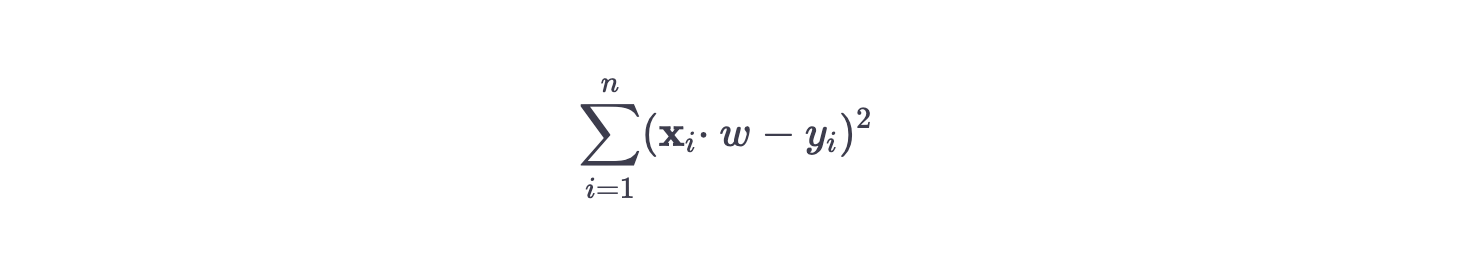

Where each xi represents a data observation and yi is the corresponding label.

where each xi represents a data observation and yi is the corresponding label.

For regularization, the goal is to not only minimize the sum of squared residuals, but to do this with coefficients as small as possible. The smaller the coefficients, the less susceptible they are to random noise in the data. The most commonly used form of regularization is ridge regularization.

With ridge regularization, the goal is now to find the weights that minimize the following quantity:

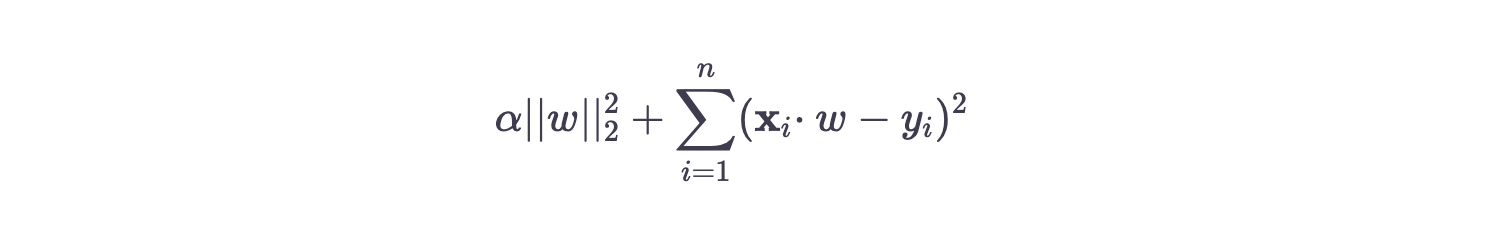

In [ ]:
# B- Choosing the best alpha

# define pizza_data and pizza_prices
pizza_data = np.array([[2100,  800],
                       [2500,  850],
                       [1800,  760],
                       [2000,  800],
                       [2300,  810]])
pizza_prices = np.array([10.99, 12.5, 9.99, 10.99, 11.99])

from sklearn import linear_model

reg = linear_model.Ridge(alpha=0.1)
reg.fit(pizza_data, pizza_prices)

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
r2 = reg.score(pizza_data, pizza_prices)
print('R2: {}\n'.format(r2))

Coefficients: array([0.00330919, 0.0023288 ])

Intercept: 2.337978289647138

R2: 0.9758349388362842



In [ ]:
from sklearn import linear_model

# define alphas
alphas = [0.1, 0.2, 0.3]
reg = linear_model.RidgeCV(alphas=alphas)
reg.fit(pizza_data, pizza_prices)

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
print('Chosen alpha: {}\n'.format(reg.alpha_))

Coefficients: array([0.00330932, 0.00232767])

Intercept: 2.338616853432976

Chosen alpha: 0.3



# **LASSO REGRESSION**

In [ ]:
# A- Sparse regularization


While ridge regularization uses an L2 norm penalty term, another regularization method called LASSO uses an L1 norm for the weights penalty term. Specifically, LASSO regularization will find the optimal weights to minimize the following quantity:

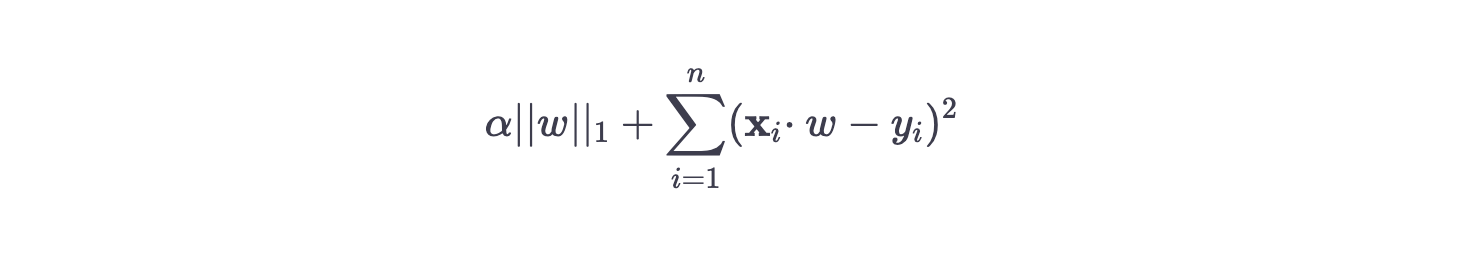


where ||w||1 represents the L1 norm of the weights.

LASSO regularization tends to prefer linear models with fewer parameter values. This means that it will likely zero-out some of the weight coefficients. This reduces the number of features that the model is actually dependent on (since some of the coefficients will now be 0), which can be beneficial when some features are completely irrelevant or duplicates of other features.

In scikit-learn, we implement LASSO using the Lasso object, which is part of the linear_model module. Like the Ridge object, it takes in the model's α value with the alpha keyword argument (default is 1.0).

The code below demonstrates how to use the Lasso object on a dataset with 150 observations and 4 features.

In [ ]:
# define data

data = np.array([[5.1, 3.5, 1.4, 0.2],
                 [4.9, 3. , 1.4, 0.2],
                 [4.7, 3.2, 1.3, 0.2],
                 [4.6, 3.1, 1.5, 0.2],
                 [5. , 3.6, 1.4, 0.2],
                 [5.4, 3.9, 1.7, 0.4],
                 [4.6, 3.4, 1.4, 0.3],
                 [5. , 3.4, 1.5, 0.2],
                 [4.4, 2.9, 1.4, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [5.4, 3.7, 1.5, 0.2],
                 [4.8, 3.4, 1.6, 0.2],
                 [4.8, 3. , 1.4, 0.1],
                 [4.3, 3. , 1.1, 0.1],
                 [5.8, 4. , 1.2, 0.2],
                 [5.7, 4.4, 1.5, 0.4],
                 [5.4, 3.9, 1.3, 0.4],
                 [5.1, 3.5, 1.4, 0.3],
                 [5.7, 3.8, 1.7, 0.3],
                 [5.1, 3.8, 1.5, 0.3],
                 [5.4, 3.4, 1.7, 0.2],
                 [5.1, 3.7, 1.5, 0.4],
                 [4.6, 3.6, 1. , 0.2],
                 [5.1, 3.3, 1.7, 0.5],
                 [4.8, 3.4, 1.9, 0.2],
                 [5. , 3. , 1.6, 0.2],
                 [5. , 3.4, 1.6, 0.4],
                 [5.2, 3.5, 1.5, 0.2],
                 [5.2, 3.4, 1.4, 0.2],
                 [4.7, 3.2, 1.6, 0.2],
                 [4.8, 3.1, 1.6, 0.2],
                 [5.4, 3.4, 1.5, 0.4],
                 [5.2, 4.1, 1.5, 0.1],
                 [5.5, 4.2, 1.4, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [5. , 3.2, 1.2, 0.2],
                 [5.5, 3.5, 1.3, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [4.4, 3. , 1.3, 0.2],
                 [5.1, 3.4, 1.5, 0.2],
                 [5. , 3.5, 1.3, 0.3],
                 [4.5, 2.3, 1.3, 0.3],
                 [4.4, 3.2, 1.3, 0.2],
                 [5. , 3.5, 1.6, 0.6],
                 [5.1, 3.8, 1.9, 0.4],
                 [4.8, 3. , 1.4, 0.3],
                 [5.1, 3.8, 1.6, 0.2],
                 [4.6, 3.2, 1.4, 0.2],
                 [5.3, 3.7, 1.5, 0.2],
                 [5. , 3.3, 1.4, 0.2],
                 [7. , 3.2, 4.7, 1.4],
                 [6.4, 3.2, 4.5, 1.5],
                 [6.9, 3.1, 4.9, 1.5],
                 [5.5, 2.3, 4. , 1.3],
                 [6.5, 2.8, 4.6, 1.5],
                 [5.7, 2.8, 4.5, 1.3],
                 [6.3, 3.3, 4.7, 1.6],
                 [4.9, 2.4, 3.3, 1. ],
                 [6.6, 2.9, 4.6, 1.3],
                 [5.2, 2.7, 3.9, 1.4],
                 [5. , 2. , 3.5, 1. ],
                 [5.9, 3. , 4.2, 1.5],
                 [6. , 2.2, 4. , 1. ],
                 [6.1, 2.9, 4.7, 1.4],
                 [5.6, 2.9, 3.6, 1.3],
                 [6.7, 3.1, 4.4, 1.4],
                 [5.6, 3. , 4.5, 1.5],
                 [5.8, 2.7, 4.1, 1. ],
                 [6.2, 2.2, 4.5, 1.5],
                 [5.6, 2.5, 3.9, 1.1],
                 [5.9, 3.2, 4.8, 1.8],
                 [6.1, 2.8, 4. , 1.3],
                 [6.3, 2.5, 4.9, 1.5],
                 [6.1, 2.8, 4.7, 1.2],
                 [6.4, 2.9, 4.3, 1.3],
                 [6.6, 3. , 4.4, 1.4],
                 [6.8, 2.8, 4.8, 1.4],
                 [6.7, 3. , 5. , 1.7],
                 [6. , 2.9, 4.5, 1.5],
                 [5.7, 2.6, 3.5, 1. ],
                 [5.5, 2.4, 3.8, 1.1],
                 [5.5, 2.4, 3.7, 1. ],
                 [5.8, 2.7, 3.9, 1.2],
                 [6. , 2.7, 5.1, 1.6],
                 [5.4, 3. , 4.5, 1.5],
                 [6. , 3.4, 4.5, 1.6],
                 [6.7, 3.1, 4.7, 1.5],
                 [6.3, 2.3, 4.4, 1.3],
                 [5.6, 3. , 4.1, 1.3],
                 [5.5, 2.5, 4. , 1.3],
                 [5.5, 2.6, 4.4, 1.2],
                 [6.1, 3. , 4.6, 1.4],
                 [5.8, 2.6, 4. , 1.2],
                 [5. , 2.3, 3.3, 1. ],
                 [5.6, 2.7, 4.2, 1.3],
                 [5.7, 3. , 4.2, 1.2],
                 [5.7, 2.9, 4.2, 1.3],
                 [6.2, 2.9, 4.3, 1.3],
                 [5.1, 2.5, 3. , 1.1],
                 [5.7, 2.8, 4.1, 1.3],
                 [6.3, 3.3, 6. , 2.5],
                 [5.8, 2.7, 5.1, 1.9],
                 [7.1, 3. , 5.9, 2.1],
                 [6.3, 2.9, 5.6, 1.8],
                 [6.5, 3. , 5.8, 2.2],
                 [7.6, 3. , 6.6, 2.1],
                 [4.9, 2.5, 4.5, 1.7],
                 [7.3, 2.9, 6.3, 1.8],
                 [6.7, 2.5, 5.8, 1.8],
                 [7.2, 3.6, 6.1, 2.5],
                 [6.5, 3.2, 5.1, 2. ],
                 [6.4, 2.7, 5.3, 1.9],
                 [6.8, 3. , 5.5, 2.1],
                 [5.7, 2.5, 5. , 2. ],
                 [5.8, 2.8, 5.1, 2.4],
                 [6.4, 3.2, 5.3, 2.3],
                 [6.5, 3. , 5.5, 1.8],
                 [7.7, 3.8, 6.7, 2.2],
                 [7.7, 2.6, 6.9, 2.3],
                 [6. , 2.2, 5. , 1.5],
                 [6.9, 3.2, 5.7, 2.3],
                 [5.6, 2.8, 4.9, 2. ],
                 [7.7, 2.8, 6.7, 2. ],
                 [6.3, 2.7, 4.9, 1.8],
                 [6.7, 3.3, 5.7, 2.1],
                 [7.2, 3.2, 6. , 1.8],
                 [6.2, 2.8, 4.8, 1.8],
                 [6.1, 3. , 4.9, 1.8],
                 [6.4, 2.8, 5.6, 2.1],
                 [7.2, 3. , 5.8, 1.6],
                 [7.4, 2.8, 6.1, 1.9],
                 [7.9, 3.8, 6.4, 2. ],
                 [6.4, 2.8, 5.6, 2.2],
                 [6.3, 2.8, 5.1, 1.5],
                 [6.1, 2.6, 5.6, 1.4],
                 [7.7, 3. , 6.1, 2.3],
                 [6.3, 3.4, 5.6, 2.4],
                 [6.4, 3.1, 5.5, 1.8],
                 [6. , 3. , 4.8, 1.8],
                 [6.9, 3.1, 5.4, 2.1],
                 [6.7, 3.1, 5.6, 2.4],
                 [6.9, 3.1, 5.1, 2.3],
                 [5.8, 2.7, 5.1, 1.9],
                 [6.8, 3.2, 5.9, 2.3],
                 [6.7, 3.3, 5.7, 2.5],
                 [6.7, 3. , 5.2, 2.3],
                 [6.3, 2.5, 5. , 1.9],
                 [6.5, 3. , 5.2, 2. ],
                 [6.2, 3.4, 5.4, 2.3],
                 [5.9, 3. , 5.1, 1.8]])

# define labels

labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print('Data shape: {}\n'.format(data.shape))
print('Labels shape: {}\n'.format(labels.shape))

from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(data, labels)

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
print('R2: {}\n'.format(reg.score(data, labels)))

Data shape: (150, 4)

Labels shape: (150,)

Coefficients: array([ 0.        , -0.        ,  0.40830957,  0.        ])

Intercept: -0.5346995583185636

R2: 0.895831189504504



# **BAYESIAN REGRESSION**

# A- Bayesian Techniques

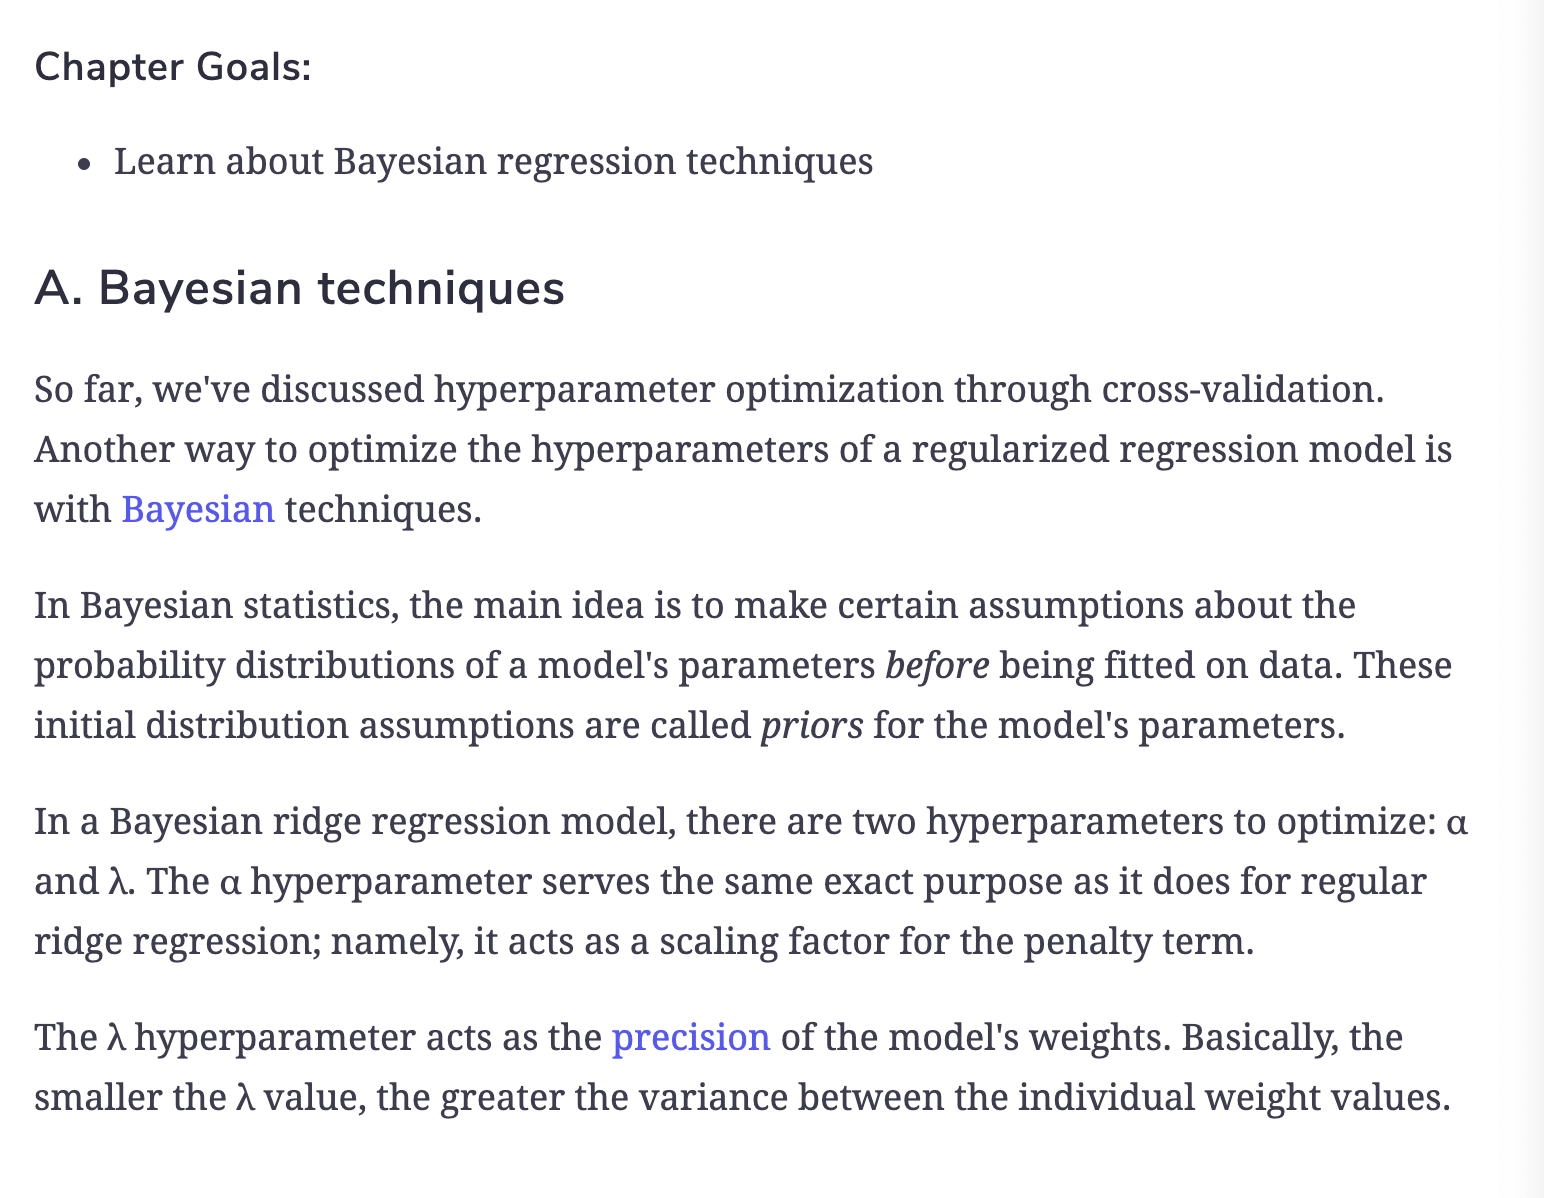

# B- Hyperparameter priors

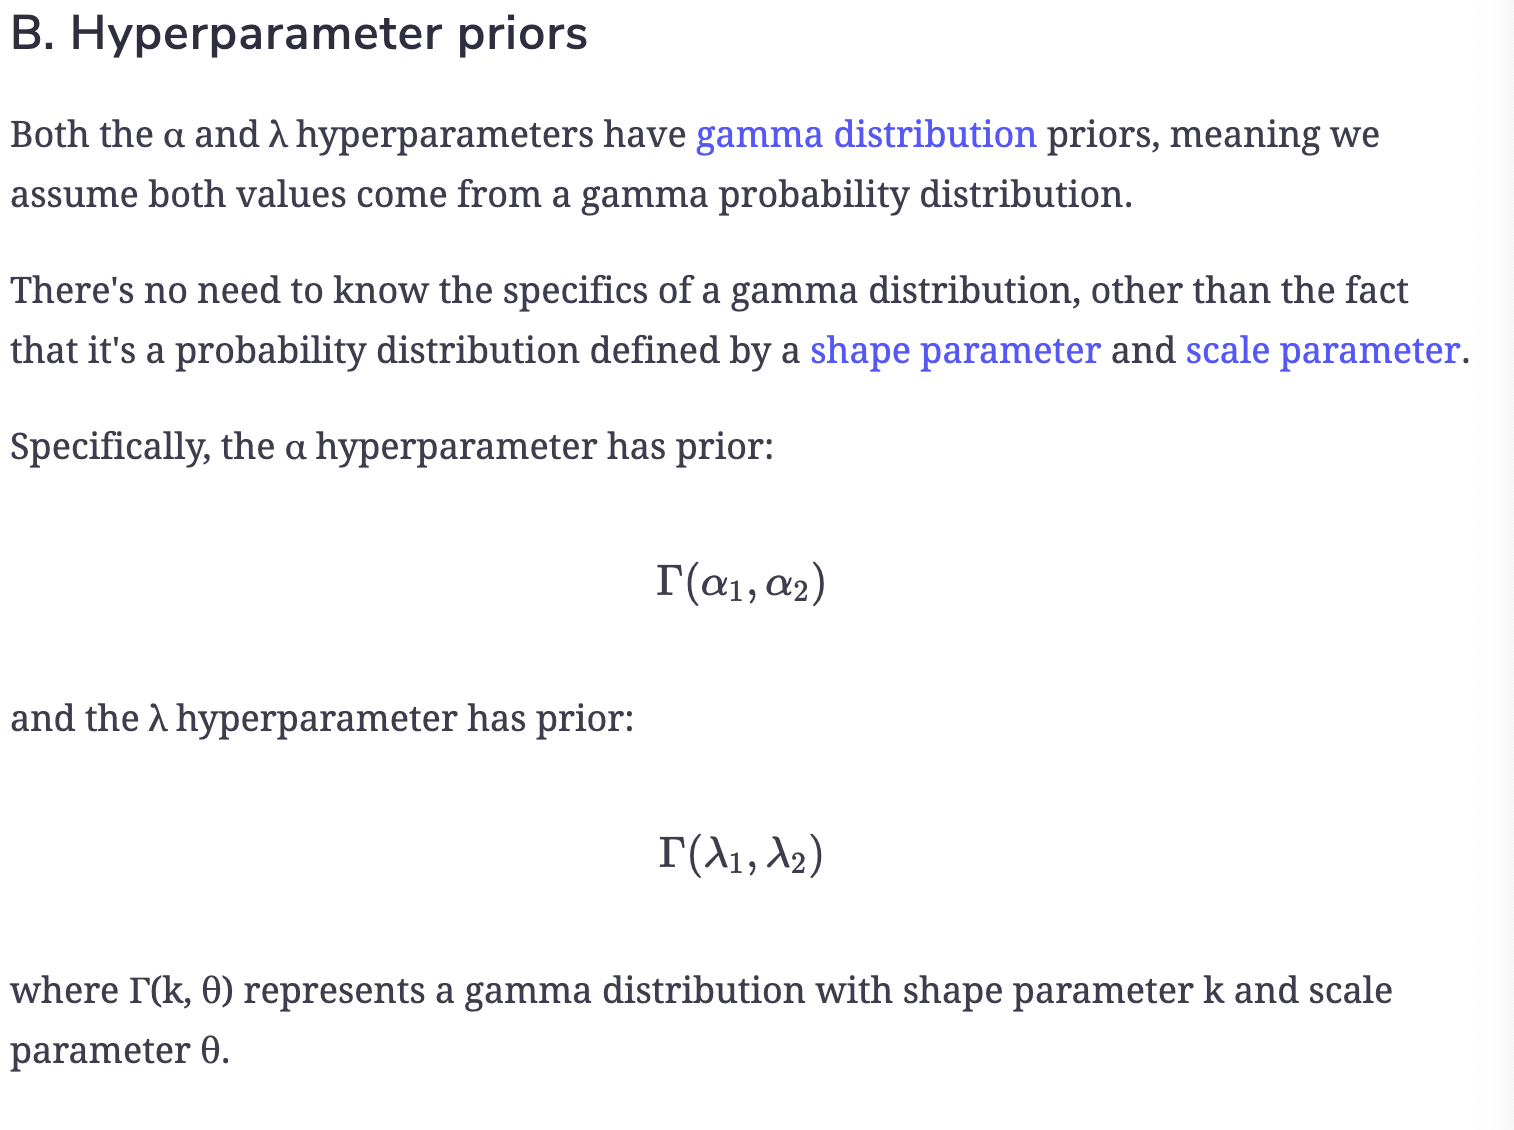

In [ ]:
# C- Tunning the Model

print('Data shape: {}\n'.format(data.shape))
print('Labels shape: {}\n'.format(labels.shape))

from sklearn import linear_model
reg = linear_model.BayesianRidge()

reg.fit(data, labels)

print('Coefficients: {}\n'.format(repr(reg.coef_)))
print('Intercept: {}\n'.format(reg.intercept_))
print('R2: {}\n'.format(reg.score(data, labels)))
print('Alpha: {}\n'.format(reg.alpha_))
print('Lambda: {}\n'.format(reg.lambda_))

Data shape: (150, 4)

Labels shape: (150,)

Coefficients: array([-0.11174556, -0.03900746,  0.24329606,  0.57345867])

Intercept: 0.17024073782276639

R2: 0.9303454947351278

Alpha: 20.984220720919353

Lambda: 9.539435179662341



# **LOGISTIC REGRESSION**

In [42]:
# A- Classification

# define data
data = np.array([[ 1.1601425703, -2.9391754402,  4.8578397601, -8.7119753100],
                 [ 1.2691224403,  1.5630181801, -3.5394534201, 1.7861283201],
                 [ 9.9579388902,  3.9156743201, -1.7097529800, 4.1993401000],
                 [-4.0718080302, -6.7380319801,  8.6728478300, -1.1759867301],
                 [ 9.3034118002,  1.8934074202,  1.3748007400, 8.4991825600],
                 [-2.1159125902, -7.9877446301, -1.4794569800, -2.8992953200],
                 [ 8.2121090002, -4.7149669901, -3.2254999101, 3.0384699301],
                 [-2.5089977601, -7.4186014601,  1.1790713901, -7.1082470700],
                 [-1.9129283402, -4.2126489601, -6.2913124100, -1.0537352001],
                 [-2.3829286302, -6.5386506901, -3.6321495900, -1.2609147601],
                 [ 3.0468781802, -1.7725059801, -1.7074547601, -4.6019686800],
                 [ 4.2436112802, -1.0922030002, -9.9113026900, -4.2546878700],
                 [ 6.3451433502,  1.6720543602,  3.7389098701, -1.9970873001],
                 [ 6.3042690601,  1.1167757602, -8.5247775500, -4.6161783200],
                 [-1.9644121002,  2.9657934201, -1.2087016801, -1.4032873601],
                 [ 5.6004682801, -2.9148348601, -1.2616716501, -1.8712787601],
                 [ 2.3585812002, -1.0842564302, -7.8270533100, -4.3772589900],
                 [ 4.4739278002, -1.0215156602, -1.1516554201, -7.9667519400],
                 [ 1.6150934503, -2.7033335102, -1.5542517901, 4.8819429200],
                 [-1.9162104502,  1.2259177701, -6.2410195600, 3.5880339500],
                 [-2.8505127502,  1.4557361901, -1.0177971201, 1.4830149000],
                 [-6.8358395202, -3.2576126001,  1.5095342701, 1.2576780501],
                 [ 1.1256045902, -9.1605539900, -2.9823687700, -4.7666986000],
                 [ 1.8737331203, -2.6019605502, -4.7216373501, 1.4719336001],
                 [ 1.2737306603, -4.7932141902, -5.7824312800, -2.0053644800],
                 [ 6.3487976902, -7.9931676301,  3.4686427401, -9.9253325100],
                 [ 8.5918412600, -1.6984420501, -2.1561164601, -1.4644103701],
                 [ 6.7778452602,  1.0482466202,  1.4660155201, -1.3774373400],
                 [ 3.7371988102, -1.3533476302, -1.9367169001, -2.2147547901],
                 [ 4.5367808902,  7.7399954701, -5.4388837000, 1.5746318700],
                 [ 9.0398127902, -3.8910187701,  1.3304320801, -1.2586272001],
                 [-1.0368931202, -1.8768532402,  6.1720733100, -1.2772003201],
                 [ 5.2494520302, -3.1227626601, -2.3064254000, -6.9163703200],
                 [ 1.0621715903, -5.0240148901, -3.1189422301, -7.6108686801],
                 [ 4.0438593402, -6.7079544901, -2.8048276101, -1.2403778600],
                 [ 4.1004975602,  2.8641319000, -1.8808008401, -4.9681253600],
                 [-8.0657794601,  2.3363527301, -1.2596332501, -1.2326116701],
                 [-3.5587785002,  6.1535566201, -6.2427854000, 4.9700905000],
                 [-1.2897315602,  1.3260688702,  7.1997791101, -7.4859000100],
                 [-1.7024572302, -9.0548753000, -1.3235453601, -6.4284205800],
                 [-1.2799476102, -3.0687498201, -1.2757259501, -3.3023231700],
                 [-4.6202800802, -5.2802587401,  2.2080201600, -8.6591405800],
                 [ 8.9702742702, -1.5172052501,  1.1848014601, -2.4785645201],
                 [-3.4375201501, -1.0767276102, -7.2203668600, -6.3648776800],
                 [-1.8470736302, -3.3080658901, -1.6230091701, -7.3931576700],
                 [ 8.0756457302,  4.2713803400, -1.4041905701, 3.0222203600],
                 [-7.8383866802, -5.6826556001,  1.3657869201, 1.0929661501],
                 [-1.6675718302, -4.0014684201, -7.0610981600, -3.7345508800],
                 [-3.6269950702, -2.1215395201, -1.0766948302, 3.2844614300],
                 [-2.0511174402,  1.3940287301, -9.2863366600, -5.7938134300],
                 [-4.3003408002, -5.3196850900,  1.2427915201, -5.3924311101],
                 [-2.3589353002,  4.5130605201, -1.2978765801, 2.3129147900],
                 [-4.1646950702, -2.5706880300,  8.1138912301, 4.2460391200],
                 [ 5.7636030802,  9.5451724201,  2.5466231201, -1.3451129100],
                 [ 1.5740407902, -2.8156747501, -1.9442683101, -3.9117171300],
                 [-4.4898271902, -1.6141200101,  8.7196182500, 2.9001592000],
                 [ 1.3421385703, -2.3114827002, -1.0430715001, 7.3688669400],
                 [ 9.0998949401, -5.2664248701, -5.6730834000, -6.3052115100],
                 [-2.8614543602,  2.3933298201,  8.7248052400, 2.2412197800],
                 [-7.4409183502, -5.4300827501,  1.1646257301, 1.5798199301],
                 [-6.1672972102, -2.7735245301,  2.9894456201, 7.6795606500],
                 [-7.4560080802, -5.6164543001,  2.1156095001, 3.3306629200],
                 [ 6.4408386201, -4.8469955901,  1.5934130801, -1.2089591001],
                 [-6.9396169902, -4.1221187601,  2.3354940701, 8.6585390900],
                 [-7.4276804601, -1.3754307102,  1.8443840901, -1.1300866801],
                 [ 4.5175429701, -1.1522659001, -8.5538463800, -9.8429737300],
                 [-6.7237670402, -4.4882462401,  1.2392217201, 2.2774343601],
                 [-4.9087952902, -8.4603200400,  5.8319019800, 3.5804986900],
                 [-6.8722319902, -5.7795967501,  1.7142942601, 6.5241797900],
                 [-3.5898187302,  3.8710491201, -1.7826468700, 6.0240089100],
                 [ 1.0924010503, -1.0503575902, -4.6286822000, -3.1013177501],
                 [-7.2466258302, -4.2228105201,  2.7178834701, 1.0632386701],
                 [ 8.2858119802, -1.8066786902, -1.6367902401, -4.9066184800],
                 [-9.5556361601, -2.5017342801, -1.2206996001, -1.2902050700],
                 [-3.2721552302, -1.7594247801, -2.0914350000, 2.9194646600],
                 [ 3.7960238702, -3.8201422801,  1.7720913801, -2.5458505900],
                 [-2.8527811902,  6.1346475001,  8.1319466600, 8.6366326500],
                 [ 8.1139000502, -7.7417380101,  4.9329688401, -1.2498137900],
                 [ 9.4686585802,  1.2057415102,  1.9997184201, -2.0722611701],
                 [-2.9925019602,  7.0783033900, -3.4017699300, 4.6869285001],
                 [-4.3650393902, -3.2450334501,  8.7194158300, -4.8440005800],
                 [-2.9836265602,  2.2672177301, -1.1469011901, -1.2216517300],
                 [ 2.0774059403,  1.7351833902, -3.7119026401, 1.6240268300],
                 [ 6.0682432702,  1.9192337002, -9.2737635000, -9.6286401900],
                 [-3.7866138602, -1.8840995701, -2.8189459300, 1.9861693700],
                 [ 8.3823603402, -1.5474407801, -6.6173412900, -5.6975481801],
                 [-6.4463084301,  3.1641266301,  1.1791997300, -7.1799663500],
                 [ 8.5461379902, -2.5184530701, -3.0525879601, -1.8766909900],
                 [-3.6050012302, -2.8285668700,  2.9111194301, -6.0571679400],
                 [-6.6791627101,  3.7836772601,  5.3317954300, -5.8773938901],
                 [-6.1942484401,  4.6672750301, -3.6600154200, -3.4972969000],
                 [-4.7370832100,  8.8703515801, -1.1576811201, -2.1448750700],
                 [-9.6556252201, -6.2354696401,  1.8039727200, 2.1057766300],
                 [-2.0747721202,  8.7104065800, -3.7932111100, -8.4894351801],
                 [ 1.5075303702, -3.1266360501, -2.4168530800, -6.2742420100],
                 [ 1.0622037603,  6.9832170101, -1.1843942001, 1.6276140000],
                 [-4.3637354702,  2.5753837801,  8.6493163200, 3.4733788000],
                 [-6.2876929602, -4.1655592101,  1.5968249301, 3.3266781000],
                 [-4.4212125002, -1.6257399201,  7.1522609401, 8.0242572000],
                 [-5.3105552801,  1.7596386901, -1.1455580501, -6.5210722700],
                 [-1.5097025301, -7.5335946301,  3.5844780200, -9.0188078700],
                 [-8.6314230802, -7.7399520601,  2.0493315601, 1.6046343401],
                 [-3.8802703902,  4.6131898800, -3.9355913500, -2.0362024400],
                 [-6.3121019402, -3.5824817201,  7.3639349600, 1.2052596300],
                 [-5.7537559402, -2.4892221401,  1.5619653301, 2.5119264800],
                 [-1.1047836202, -7.8764761101,  4.9262639801, -1.0807334000],
                 [-4.3385587502, -2.1210520601,  4.5026827200, -2.7100363000],
                 [-3.8725858902,  1.3499559801, -9.4714228000, 1.0934389500],
                 [ 1.7164192203, -3.6548734401,  3.2811850601, -1.1425935901],
                 [-4.4559426002, -3.3179140801,  1.2162097400, -2.0916117100],
                 [-6.2993093202, -4.5668814401,  1.8744667101, 4.5168840200],
                 [-3.9349561802,  3.4154773901,  1.5380553700, -3.3261938600],
                 [-1.5955009002,  6.8204174001, -3.8343593300, -7.3219255500],
                 [-6.0077454202, -1.1691616001,  1.3668266401, 2.3307678900],
                 [-7.3235055802, -5.3754869101,  1.1053038101, 9.0237785300],
                 [-3.6775230902, -3.0687923301,  5.2636084100, -1.0215207000],
                 [-7.3674400602, -3.3809551001,  1.9183422001, 9.3306298200],
                 [ 1.9825072102, -8.7510141401, -1.0757523101, -6.2668348700],
                 [ 4.0221787002, -9.3714701401, -4.1738539800, -5.8096630900],
                 [ 4.9588690102,  8.2418785601, -1.4295628801, 2.4446715800],
                 [-4.4893254702, -2.3222632701, -4.1068109800, 9.3431268200],
                 [ 7.9346730502,  1.4432702301,  5.9404435100, 2.8858186200],
                 [ 1.6047984003,  3.2866757002,  1.0102054402, -4.1380164800],
                 [-1.2352459602,  5.8301639001, -9.7167471800, 6.4436427300],
                 [-2.6655332002,  4.2263065101, -1.0920667201, 3.9771350100],
                 [-1.6774712802,  2.3655732601, -1.3352872201, 1.5152369800],
                 [-7.0650634701, -5.4097441601, -1.7407879601, -1.2280869101],
                 [ 8.1532415902,  7.2153864301, -4.9106865500, 2.1556651700],
                 [-9.0246969601,  7.8614425101,  3.4167430000, -3.3204819801],
                 [ 8.8599927302,  9.1833574801, -2.7107014101, -9.8325588701],
                 [-3.9136853402,  3.8337641400, -3.4091715000, 3.2873961300],
                 [ 2.8494813202, -6.2392014501, -7.9487024600, -1.8743608200],
                 [ 3.3277568802, -2.0219026501, -1.5957390001, -6.8082158600],
                 [ 9.1166609201,  6.9690705901, -1.8128231301, 4.4659321400],
                 [ 8.2613212702, -8.9246036800, -1.7741964601, 1.7154767400],
                 [-2.7244396502, -9.5164601200, -5.3384135400, -4.1409291800],
                 [-4.0604603302, -2.4617348701,  1.6979041201, -4.2462111201],
                 [-4.9211867602, -1.0894672300,  2.1146285701, 4.8184381800],
                 [ 9.3695342801, -2.6591725401,  5.5438780601, -1.0408446801],
                 [-5.2316345702,  8.7333281601,  1.5827946001, 8.1346507000],
                 [-6.5227480602, -3.4638704501,  9.9965234000, 1.4389809901],
                 [ 3.8544959102, -4.7383326201,  1.2214025001, -2.0768928700],
                 [-4.5744912902, -2.3897089401,  6.8519756400, 7.7038329002],
                 [-2.7764899902,  8.7697834301, -8.5238338000, 5.8689830301],
                 [-5.3284158502, -2.8434757001,  7.9216911000, 5.6141892100],
                 [-4.3333209902,  2.7697495800,  8.9539109900, 3.9201457800],
                 [-3.6346053502, -4.0668458701,  4.4945209500, -3.0380014200],
                 [-4.2358552001,  6.6697424101,  5.3966274901, -2.8790951300],
                 [-1.0546867502,  4.6561009801, -1.4159157201, 1.2104486101],
                 [-1.6962935502,  2.0523077101, -9.3768857000, 3.5487858500],
                 [-2.9631144502,  2.1176185601,  1.0864080301, -7.7525091501],
                 [-7.7608860402, -5.9073378101,  1.4842045601, 4.3842838500],
                 [-6.1175000102, -4.3852126501,  4.4761007201, 4.2554092400],
                 [-5.1956160102, -5.3541824100,  5.0389284600, 1.0139324601],
                 [-2.3488474102,  6.3752900200, -4.6106009000, 2.3514237400],
                 [-3.7301371102, -2.3597730800, -2.8130564200, 1.8269870300],
                 [ 5.2387676702,  4.6053748701,  2.3697492501, -3.1663641600],
                 [ 2.4707096202,  1.1429591602, -8.5156284900, -1.6142982600],
                 [-4.0620905502,  3.9832222600, -3.9033500700, 8.2662346200],
                 [-5.0229356502, -3.3534324201,  7.2854464400, 8.8499262400],
                 [-4.0997842202, -2.6302284301,  2.0752340301, -5.0623037200],
                 [ 7.9062139202,  1.1127201102,  3.4233959701, 2.7762418900],
                 [ 1.4484283603, -2.2324078102, -2.1732781301, 9.8784860100],
                 [-3.7999084002,  7.1192617400,  2.2056263600, -3.4511108300],
                 [ 1.8393688903,  9.1288897301, -4.3399788701, 1.9194329501],
                 [-6.7106318001,  8.1312493701, -2.0458461701, 1.9646866100],
                 [-5.5540621002, -1.2222872701,  3.3499590500, 1.4569805101],
                 [ 4.4620267602,  1.2249920700,  1.9100524500, -8.1159848801],
                 [ 8.4241445002, -1.2219219702,  3.4965496701, -1.1459605401],
                 [-5.8892481701,  7.1768599801, -1.3360200501, 2.1992035700],
                 [-3.8386745302,  8.9118693500, -1.1456502200, 8.0664953000],
                 [ 5.0487707501, -1.3539552802,  5.2245938501, -6.1559540800],
                 [ 2.3251516402, -4.4384997401, -8.8673950600, 3.2533276600],
                 [-5.6209500202,  9.8085254900,  1.1029099101, 9.8863575800],
                 [-5.6384504202, -1.6186735401,  1.4126293501, 7.7515475600],
                 [-7.5596762402, -4.3841094201,  1.5286477801, 1.4125052701],
                 [-6.0344413502, -4.7208516301,  2.1696663701, 1.7779185800],
                 [ 1.7868853602,  1.0033921802, -2.0487161501, -6.6893636400],
                 [-3.0073413902,  3.0927455201, -9.1518481600, 4.5530147601],
                 [-3.4203887702,  3.5943916201,  9.0453854101, 9.0431765000],
                 [ 2.8282414403,  1.5124856802, -6.6293035301, 3.2534078301],
                 [ 1.3763923103, -6.5759802501, -3.5595640701, -2.1907559500],
                 [ 3.9019915702, -1.0622410502, -2.0779495701, -2.8495478300],
                 [-4.8602394302, -1.7537113100,  1.0161930901, 6.9305517000],
                 [ 1.0705828002, -3.8219656601, -2.7102304601, -1.1937539500],
                 [-5.5574884002, -5.8679361601,  1.8324279901, 5.8415680800],
                 [ 6.5258210502,  5.5345268001, -4.7947771401, 6.3411019300],
                 [-4.3024809302, -1.4406183001,  1.9284832100, 3.4887630100],
                 [-4.5346583702,  9.4968643300, -1.8605550301, 3.1761536400],
                 [-3.8606738602,  9.7616653800, -2.7036339801, 4.6786445600],
                 [-1.2435086602,  2.3025589801, -3.1331983900, -1.3284039001],
                 [-3.3329835902,  3.0343635001,  3.1746039601, -2.9234743300],
                 [-6.8546964202, -1.4722242101,  2.1145826201, 8.8966981400],
                 [-1.8783080202, -9.4083800901,  4.3375454100, -1.3509882401],
                 [-7.3133161901,  6.4280375801, -1.3399158901, -1.4468998401],
                 [-3.1269732102,  2.6822885501, -7.1567101200, 3.6069648700],
                 [-9.6162421901, -1.8049561101,  1.3521694501, -1.4589200301],
                 [ 4.9081802902,  1.3575393702,  7.8537643000, 5.8649828001],
                 [ 9.4787321902,  2.6675468000, -4.0112963801, -7.0943437600],
                 [-308.52588757, -40.27791179, 4.26041604, -2.54290949],
                 [ 1.3241975102, -9.5379570501, -2.8210659301, -2.7406229900],
                 [ 4.6121781202,  6.7936435101, -2.6718783101, -4.0418590100],
                 [ 1.4826088603,  3.0741711402, -4.1464544701, 3.1057622300],
                 [ 2.0441859902, -1.9038327702,  6.8274426501, -1.7607859301],
                 [-2.6362343602, -4.2768552601,  4.7206997600, -1.6211021900],
                 [ 1.2467005402, -3.6341792200, -2.1110085201, 2.6974925700],
                 [-6.5820746002, -2.2916076201,  9.8449169200, 6.4041436700],
                 [ 4.1294292302,  4.2592979701,  4.5457621400, -1.6491926800],
                 [-2.7241273802,  1.7946580701, -1.1095278301, -7.7585939200],
                 [ 8.0269891901,  3.3451773301, -2.4944690801, 8.1228645500],
                 [ 9.9705147202,  1.4121597002,  1.4600715101, -3.3637124900],
                 [-4.0509297002, -2.0742181201, -2.7096028601, 1.4264275200],
                 [ 2.3667007103,  7.3962091802,  3.5176809002, 2.0035900100],
                 [ 2.7363827102,  1.7822700502,  1.3498534900, -4.8882070700],
                 [-8.1933585801, -1.7803102400, -6.3632331200, -1.5632875601],
                 [-1.5162188802,  2.8801522500, -9.9438439500, -3.7534932000],
                 [-4.1542810902, -9.1954122100,  4.2532113000, -1.6657520200],
                 [-5.8235415002, -3.8215307301,  1.5724705301, 1.9931268100],
                 [ 1.2679599703, -9.3601212701,  1.4145869301, -1.1005497202],
                 [ 1.6628153503, -3.4327903702, -1.9917395001, 2.0960428601],
                 [-1.9487652202,  1.7094854901, -1.2185215001, 6.0161732400],
                 [-2.1520650002,  2.0866930701, -7.7819835800, 2.7260016600],
                 [-6.1109311502, -3.0543169501,  9.7080650100, 4.6161738800],
                 [ 2.3261571902, -1.6608823901, -2.1926401901, -5.9369058400],
                 [-2.0401509302, -3.6862487100, -4.3452206500, 8.1894802801],
                 [-1.2781383601, -7.5951997000,  8.5600836500, 2.8871515800],
                 [-5.8575513202, -2.6661185001,  5.1408431700, 7.2426948100],
                 [-4.6999597301,  6.3135109501, -1.9090534401, -1.1575325100],
                 [-3.0294396202, -2.5768441900, -5.0330906900, -3.9049892100],
                 [-2.2832773602, -3.9088965901, -3.4577272000, -1.1068811201],
                 [ 3.8850433802,  4.5547365101, -3.1155203501, -2.0406128500],
                 [-5.0272108302,  1.5779414601, -3.6586149400, -5.3719624400],
                 [-4.9115089402, -1.7225724201,  2.5684703500, -1.1303937701],
                 [ 1.1940117303,  5.3175212501, -3.6871250101, 4.4069887401],
                 [-6.6287051302, -3.8723017501,  1.0864186001, 1.0428035601],
                 [-1.6880290602,  4.1601138201, -9.3688754300, -2.9393632000],
                 [ 2.2964799903, -2.0309928102, -9.1097569400, 1.3111611801],
                 [ 1.0839297503,  1.0565976202, -1.7666041101, 3.4455845400],
                 [-1.1608623502,  3.3935190701, -4.9728327600, -1.2816031501],
                 [ 5.8979683202, -4.6662433101, -2.5106097901, -1.7801792901],
                 [-2.1073336502,  3.4397929701, -1.2841525300, 5.9333681000],
                 [-3.8293115202,  2.2289502101, -9.5072829300, 7.8911179200],
                 [-4.8758233802, -1.5619326201,  2.8768021600, -4.9894789900],
                 [-1.8289246202,  3.5223181501,  9.3446502800, -3.8632308300],
                 [ 7.1990638002,  1.4965220802, -2.1573114401, -3.6089676200],
                 [-5.7457450802, -2.3654243601,  1.5583115201, -4.1833125001],
                 [-2.9865071702,  4.7567929601, -1.0182638901, 2.4858492600],
                 [-2.8125573702,  3.4519788800, -9.2646842300, -2.3281498000],
                 [-5.2476915902, -4.3287198801,  5.9571244100, -5.6476713700],
                 [-4.6296033402, -1.0932203701,  4.6520726300, 5.2871393900],
                 [ 1.3388984503,  2.0729350401,  2.3559256201, 4.3805251600],
                 [-4.4724893902, -1.8883881801,  1.2049238901, 1.8132826800],
                 [ 1.1885327003, -7.4674434401, -1.2573852001, 8.4236172700],
                 [ 4.3372977502,  5.6669647801, -3.1473766201, 2.8342814400],
                 [ 1.2014375803, -1.2687795702, -3.4659234901, 1.0626353201],
                 [-7.3886244801, -1.6358728901, -8.6835389701, -1.3099203500],
                 [ 1.1849305103, -7.0069607901, -1.0634426000, -1.5853322401],
                 [ 7.3357543701,  2.5598230001,  1.3572058601, -7.6643837800],
                 [ 3.6360715802, -7.6689369201,  7.5688296901, -2.7571216801],
                 [ 1.7860649502, -3.3266989800, -2.9267383201, -2.3510620401],
                 [ 1.1530743703,  4.1070525901, -5.2359051401, 8.1315845702],
                 [ 4.3328477102,  6.2777986901, -2.0605075801, -1.4207268400],
                 [ 5.0967967302,  3.5901336001,  2.1186972301, -7.7809319300],
                 [ 1.4536968302,  3.2500651001, -2.6787272801, -1.6376360000],
                 [ 6.1724296702, -5.4543081601, -2.9165344601, -2.4767870601],
                 [ 2.5848281403, -6.7153226302,  2.2322493401, 9.7852844200],
                 [-5.5081553602, -2.7398911101,  1.7944740501, 2.9013327301],
                 [-2.3659221902,  3.3418778801, -1.1128804100, -6.0024328500],
                 [-3.1744723002,  2.4844421101, -4.3453737900, 3.2877034800],
                 [-5.6428814102, -2.1259892001,  1.2271645101, -2.6229320501],
                 [-1.8088438602,  8.2624040301, -1.9547623401, 7.4553948400],
                 [-5.0215857202, -8.7676575300,  1.6244134200, 9.5398658100],
                 [ 1.7260947603, -6.4809273301,  2.0642494501, -1.2469556800],
                 [-6.4072340102, -3.9891495201,  1.3190859101, 8.3021777200],
                 [ 5.5479306002,  6.6045344401, -2.6128084701, -3.3595703100],
                 [-4.6264785602,  2.4510715601,  3.4652892101, 2.9579468600],
                 [-4.9711808002, -1.7391369200,  5.2895857800, 8.2859514500],
                 [ 5.3585230502,  1.9797587502, -3.4189661201, 7.8895293200],
                 [-1.6487330202,  2.6825450900, -8.9304651300, 9.9020829201],
                 [-2.1605489002,  5.1678818101, -9.4005329100, 1.9944051000],
                 [ 9.7389155102, -2.4588466701, -2.5398006801, -6.4542274900],
                 [-4.1513364902, -1.4609542301,  2.1240019901, 4.8752248400],
                 [ 8.9441914002,  3.1330960801, -3.7321354001, 3.4287523800],
                 [ 2.0670012302,  5.0762720801, -2.5311350501, -5.3222535600],
                 [-3.1632140802,  2.9778596001,  3.8645132801, 2.6913482500],
                 [-3.5793574702,  2.2312701601,  2.3317500800, 3.4995359700],
                 [-3.9783464002, -9.4148524600,  3.3000230400, -5.9969642500],
                 [-3.3345628902,  3.8694463301, -8.6852392600, 1.0182263401],
                 [-5.1467656302,  6.9270281000,  2.3285154001, 3.9344064401],
                 [-4.9615538902, -3.0067082000,  5.2097004600, 1.2285717600],
                 [-9.6626344201,  5.6147208001,  4.1384538601, -4.2283288100],
                 [-4.4150707701,  6.4599265301, -1.4027462701, -2.9768453900],
                 [-3.2702301902,  3.2504517401, -4.3850148300, 5.1046950600],
                 [-4.2717331002, -1.9538394900, -2.4296525300, 1.5485235700],
                 [-3.6551213502,  3.0500407601, -6.5593708400, 6.2518694500],
                 [-2.2642313302,  5.2299010401, -9.9659852500, 8.0877767600],
                 [-5.7088507702,  4.2810568100,  3.6459991800, 1.2226234401],
                 [-3.9551244902, -2.1662001801,  3.1265358801, -1.8836098101],
                 [-6.4344299201,  1.2896652301, -1.6431767401, 7.2479777501],
                 [-6.1088509802, -5.7452466800,  1.5077928701, 2.2539646300],
                 [ 1.2992324603, -1.2745438802,  2.1361331901, 2.0579174900],
                 [-3.7751034202,  1.3964653501,  8.8902017100, -7.7281511701],
                 [ 1.0100107103,  8.3911135901,  3.3069887501,-7.3324155700],
                 [-6.0057413202, -1.2331472801,  4.0996868100, 4.8712395600],
                 [-4.6598836002, -1.2618854701,  8.9426329300, 2.0918426400],
                 [-4.7029605902,  6.1601320500,  4.1000259100,-4.4302809900],
                 [-2.7086807802,  2.5877913701, -9.6090739600, 5.5697215900],
                 [-7.2356756002, -4.1168175701,  1.1674467601, 1.2065395701],
                 [-2.0278422302,  1.8571407401, -8.3077512200, 8.7199070300],
                 [-2.4306663802,  1.8113204100,  6.6060986400, 6.3196546100],
                 [-4.6433068302,  4.0443957000, -2.8774007700, 1.6070350500],
                 [-2.9530651201,  2.9229752701, -9.6670452000, 5.6222602100],
                 [-3.0298906202,  7.0232438500,  1.9415738900, 6.1810300000],
                 [-4.8250022602,  3.9706483900, -3.3336316300, 1.1316303101],
                 [-7.7505494602, -3.9079412701,  2.2630061101, 9.2447241600],
                 [-3.7935292502,  2.6286312901, -6.1129833100, 6.8126172600],
                 [-4.1634825802,  2.5194242701, -6.7442550101, 9.8344575800],
                 [ 7.1045379102,  4.6116990200, -3.0817877901, 6.0556927200],
                 [-7.1326992202, -4.8445460901,  2.4540790601, 9.8927335501],
                 [-4.0481301302,  3.7428738001,  1.3767434701, 5.2680061300],
                 [-5.9230047602, -2.8600919701,  1.6386193701, 6.3437968300],
                 [ 9.8702311102,  1.2662998902, -2.0446631901, 1.0100705801],
                 [-3.1948375002,  1.7557839401, -6.1298398200, 3.1724049300],
                 [ 1.2222125203, -2.7803585601, -3.9542754201, 4.9486191802],
                 [-3.5781266002, -1.4167255101, -1.2546757700, 2.3323537600],
                 [-3.4876580302,  1.7807915501, -3.2274877300, 3.3372531700],
                 [-1.3265799502,  3.5096634001, -8.8550176200, 8.2466475300],
                 [-4.1542431002,  6.5695835600,  2.6178102701, 4.5861864000],
                 [ 2.8884442902,  1.1239600801, -1.3213130501, -8.1274834000],
                 [ 1.7132541202,  9.8383139301,  6.9462251700, -1.5971439700],
                 [ 2.3381932702,  2.0255707501, -2.0803735301, 7.7153300201],
                 [-2.8445188602,  7.4161939400, -4.4668720900, -3.0858779400],
                 [-5.2042917702,  1.6432495800,  8.7233700500, 1.3047015000],
                 [-4.7084222702, -2.5481561301,  1.5915953300, 4.6587124100],
                 [-3.8813895002,  1.1381618701, -5.2790716100, 9.2994403901],
                 [ 5.5165602202, -2.4064308001,  1.5145082701, -1.1459832101],
                 [-3.3495559102,  3.7981141901, -7.1036307400, 8.0457516300],
                 [ 1.0780479403, -1.4125033902, -1.1359685701, -1.5159522900],
                 [-6.0503529802, -3.6952913801,  1.1158210501, 2.6862339300],
                 [ 2.3042175903, -1.1753510902, -1.2235679700, 1.8781825201],
                 [-2.3014142601, -1.9145921800, -7.4194171200, -6.5998824501],
                 [-6.4701643102, -4.7125425701,  8.8435360600, 4.5697124800],
                 [-5.2442924802, -1.1803778701,  1.6379092001, 5.0995181400],
                 [ 8.4594714202,  1.1900099702, -2.1633707401, -8.5017498900],
                 [-4.3423447402, -1.1635228101,  8.8724026400, 5.0172845100],
                 [-6.2225533602, -1.3532815801,  1.4625223101, 6.9332165800],
                 [-3.8209743002, -1.4423929501, -7.7346323001, 2.4290462101],
                 [ 7.1150165500,  1.1868032601, -1.2179258401, 1.9219520500],
                 [-4.7889999602, -5.7826752700, -7.7351925601, 6.1277880800],
                 [-4.4799886802,  4.4791812100,  1.1552891901, 4.6705597800],
                 [-4.1161468902, -2.4702551801,  9.3892052900, 5.2628209600],
                 [ 8.4931890101,  7.1363453701,  4.3524091500, -8.0767384000],
                 [ 2.7210009003, -6.2736293501, -3.5965632701, 2.4831421901],
                 [ 1.7849341602, -3.5047025001,  1.2441657301, -1.1301028801],
                 [-5.0641489302, -9.5271723200,  1.7447988001, 6.8031947600],
                 [-3.7329188102,  2.8442667901,  7.6842548400, -7.4764342501],
                 [-3.2237884902,  2.8122162101, -1.4577993400, -3.1007598000],
                 [-1.9201671502,  4.4290914401, -9.1655386300, 1.8281366200],
                 [-7.1087822502, -5.4053021701,  3.1138824501, 8.0966564300],
                 [-5.7351275602, -9.3449118601,  2.3453214301, 1.7642316600],
                 [-3.3766283102,  1.3603108801,  7.1976794600, 4.3739028300],
                 [-2.7926417902,  4.1518148401, -4.2493607600, -3.1454879900],
                 [-3.4080935902,  2.0728759901, -4.0976120100, 1.0037038400],
                 [ 2.0475700602,  9.0211725401, -1.8883469301, 1.7562625400],
                 [-2.4038040202,  2.4968074201, -1.3658962701, 4.6825454600],
                 [ 1.1021770903,  7.8987590501, -2.9533391501, 4.9505217200],
                 [ 9.8052146902,  8.5497524201,  7.2461206900, -9.9645532700],
                 [-3.2205401402, -3.5339220901, -3.7248705100, -4.1119311801],
                 [ 2.4049422903, -4.1230914302,  5.6023706601, 2.5402315501],
                 [ 1.5861282903,  8.9482589500,  8.2845274901, -3.2761234200],
                 [ 3.4025237602,  1.1238895901, -1.4767261101, -7.1219368900],
                 [-2.4214580501,  8.0777953001, -2.1451635201, 9.7979672600],
                 [ 9.3939972102,  2.8585296402, -5.5125817901, 1.1144542101],
                 [ 1.2658825003,  2.8639156001, -3.3180947901, 1.1786558401],
                 [-2.2014164002,  4.4199613101, -1.4516739701, 2.6474774200],
                 [ 5.2152936901,  1.2455117002, -2.9603704001, 3.1974966700],
                 [-6.1828917702,  3.4935001700,  1.4230121800, -2.1864469601],
                 [-2.2045440902,  2.4165514501, -1.3758656801, -8.4739415800],
                 [-2.3115305602,  5.2562963001, -1.6551210401, 3.7802754200],
                 [-4.7186724802, -5.7722761301, -6.8579209801, -1.0195633901],
                 [-4.8664859502, -1.9861394901,  2.9878613000, 2.7480880400],
                 [-5.1897729302, -1.6573427601,  8.1768069601, 5.0250526700],
                 [-4.4438041702,  2.6305793701, -6.5888572600, -5.1405951500],
                 [-3.4008121102, -1.8814042001, -2.5305657900, -2.2471691800],
                 [-2.7952955802,  3.6724807901, -9.8717078400, 4.0476670800],
                 [-9.9769759201,  7.1949938401, -2.6028266000, -5.6116577200],
                 [-4.0112751902,  1.7062983101,  2.0163029600, 3.9544774200],
                 [-1.4689051402,  2.0388089001, -8.9847499000, 4.8266063600],
                 [-5.0580813502, -1.3589690700,  1.1262801901, 4.6044596200],
                 [ 6.4149792602,  2.1995620002, -8.0546723700, -5.7711882500],
                 [-5.9071928102, -3.2999850901,  5.6634233600, 1.0775214801],
                 [-7.0173134902, -6.7731700901,  2.9426695901, 6.6503547300],
                 [ 4.5768725902, -1.7134284002,  8.9963290301, -1.0009524201],
                 [ 1.4189768803,  2.0357178901, -3.7963559601, 7.9168550000],
                 [-3.8390776202, -1.1905535001,  3.2809016900, -8.4293136601],
                 [-1.9291557502,  6.2573018601, -1.7274335601, 2.4837056100],
                 [-2.2683533302,  2.3875102901, -8.9472949700, -2.2383158100],
                 [-3.2422305402,  2.5065914801,  8.1739859600, 1.3376168700],
                 [-4.7375753802, -3.7674291701, -6.7153284602, 6.7115496800],
                 [539.39908938, 70.83058341, -31.36554578, -11.44239946],
                 [-3.8923026002, -2.5524495501,  6.8727376400, 1.7677518600],
                 [-3.6047074302, -3.0532394201, -6.3053544701, 7.1639152900],
                 [-2.8940549202,  2.3345471501, -4.5061549500, -2.0831878000],
                 [-3.3430660702,  2.9560629901, -1.0480347901, 3.0064764800],
                 [-3.9435934202,  2.1525681001,  1.2237757701, 6.8224485500],
                 [-4.9786151302, -3.2007797501,  1.3506358801, -1.4865821100],
                 [ 1.3217336202,  8.9364720601, -2.6583571401, 5.2198892300],
                 [-2.7366921202,  1.8292241900,  1.6134009201, -2.5418433300],
                 [ 5.7620958802,  4.5166396201, -2.3246578401, 6.1265934201],
                 [-3.3016420502, -2.1296952601,  4.0826778100, -8.1048305901],
                 [-4.4124795202, -3.2135443401, -2.0358584100, -4.8315297300],
                 [-4.9786764502, -2.8827235301,  1.4649150800, 1.8220217500],
                 [-6.9845281602, -2.9991105101,  6.4043225400, 1.9703990200],
                 [ 8.2821769400,  4.0248907001, -1.3179773401, -5.8191070000],
                 [ 7.7349636301,  2.8790579001,  1.5346853801, -9.4638973800],
                 [-4.2186366402, -3.6009453800,  2.7655345400, -1.7311692600],
                 [-6.4630885402, -5.8213062101,  2.2010639101, -8.4903600101],
                 [ 8.2621114202, -3.2290151602,  9.1305845001, -1.3775525801],
                 [-3.5259992802,  2.6095556901, -3.0709985100, 7.9166725800],
                 [-5.0532489002, -1.5815993101,  7.1721387400, -1.5784244500],
                 [-4.3633800902, -2.3007910501,  4.3659010900, -2.1392074700],
                 [-5.9157373401,  3.8710744301,  1.1060106801, -4.5028178600],
                 [-4.7574290502, -8.4917431301,  2.3550404000, 4.2253328600],
                 [-1.8906448902,  2.1171275801, -1.1097055701, -2.6239207300],
                 [-6.1719438502, -5.3227211101,  3.8707605901, 1.2427249500],
                 [-6.1382944302, -3.6087272701,  6.5177837200, 2.1144445100],
                 [-5.4441315602, -4.6543155201,  1.1286252501, 1.7518269100],
                 [-4.8880488202, -4.9738637201,  7.3544081600, -5.4526170900],
                 [-5.3717397602,  4.0719268600,  1.5742520701, 7.9258571700],
                 [-3.3199306402,  2.1100847001,  1.5694438400, 3.5775210000],
                 [-2.4865791301,  5.1020052701, -1.7416019101, -1.6721066101],
                 [-4.1018684102,  2.9410370201, -2.5779559200, -1.3674978700],
                 [ 8.2158972802,  1.9867610202, -3.4810974301, 5.4774371500],
                 [ 8.5739018102,  1.4629346801,  1.5795781001, -8.2795041201],
                 [-7.9188928401,  6.9741416901, -1.2371462301, 4.4528752100],
                 [-3.9120972601, -4.1604967101, -2.0073103701, -7.4489989400],
                 [-2.9317033502,  7.0687107500,  2.1902479200, -2.2257958000],
                 [-1.3466989002,  3.0523915001, -3.0335454501, 2.2326563000],
                 [-1.4525073002,  1.4958265201, -2.9552990500, -2.4423447800],
                 [-1.9016493602,  5.8194430801, -1.0646966901, 5.6868550900],
                 [-4.9369084302, -3.2796791301,  4.9299430700, -6.0383703600],
                 [ 4.8837622802,  2.4944066101, -9.8861659900, -7.0844848400],
                 [-1.8514524702,  3.1467969401, -7.3468818001, 4.9127823300],
                 [-6.0482297102, -1.9407421500,  7.4752759700, 6.1650404100],
                 [ 5.2570688802,  7.3275761401, -3.4307576801, 6.3916328300],
                 [-4.2563351202,  7.4896087100,  2.6143663600, -4.8169385700],
                 [ 6.4604622502, -9.4484648600, -3.3338455901, -1.0285788101],
                 [-3.4324141501,  4.3650017001, -1.9061039901, 2.7582639700],
                 [-4.1021318501,  3.0108465601, -1.5664001901, -2.7629293300],
                 [ 1.3564599403,  3.0999424501, -3.3367406501, 8.1017322500],
                 [-4.3619258502,  3.0451395400,  4.2247403800, -2.2304591900],
                 [ 7.4138489002,  1.7811106502, -2.6426488601, 1.5547654000],
                 [-4.1694115302,  3.2148860300, -3.5476510300, -9.2300178600],
                 [-1.1787133502,  5.8960011501, -8.5324428900, 4.8886543400],
                 [-2.9696896402, -1.0440448001, -1.0170702801, 3.9199940700],
                 [-2.0088095302,  7.0454306000, -8.7958057701, -1.3228826301],
                 [-4.2710587002, -2.2323864501,  6.2826192600, -1.2045172401],
                 [-2.7382155702,  2.8276811801, -7.8295398100, -5.2185131300],
                 [-2.8658876602,  1.5449773001, -3.3676494900, -4.4991851700],
                 [-6.4492888702, -3.6560336701,  7.6982429400, -4.5741598800],
                 [ 8.0371611202, -1.6209869002,  3.0416133401, -1.1536381001],
                 [ 3.8671780503, -1.7101744002,  2.9275167002, 1.7023425301],
                 [-1.3033436702,  6.8153478301, -1.3315808001, -5.5973895500],
                 [-4.5705415902, -7.2854553500, -1.6301113400, 2.2861370400],
                 [-2.2741102702, -5.0288910601, -1.0656356501, 2.4863166200],
                 [-1.8392813502, -1.9402889001, -7.7654905700, -1.2062001101],
                 [-2.2539549802, -1.4661046700, -9.6937029001, -4.7892133900],
                 [-6.2087217102, -5.6002276801,  1.6490373701, 3.8375045400],
                 [ 6.4881111802, -9.6782249900,  2.7562352801, -9.1135427300],
                 [-4.2974820902, -2.7507014401,  1.1343132301, -3.4101594300],
                 [-6.1505897702, -5.6189823801,  1.7918438301, 3.2752578100],
                 [-3.7387229902, -1.2997158001,  2.5367920401, -9.5644727600],
                 [ 3.8130554201,  1.4014796401, -1.9348027901, 4.9798219900],
                 [-3.7389333402,  4.6241571600,  1.5493117801, -1.0216087901],
                 [-5.3811644202, -2.1068416301, -3.4384858701, 4.1092754100],
                 [-3.1328262002,  1.6054610101, -1.1345420601, 3.7925754200],
                 [-6.3492672501, -4.0798588300, -6.7170099500, -7.1889865300],
                 [-1.6834386702,  3.6438066901, -1.7281356101, 2.4954944200],
                 [-4.8448154102,  4.1955708401,  1.2678898700, 3.6738857600],
                 [ 1.3450326102,  1.0745721802, -1.6562952601, -5.2056066300],
                 [-3.8980895302,  2.0760054700, -2.5372349300, -1.9541794700],
                 [-7.0462966101, -1.8560096601, -7.9551758500, -1.3510810701],
                 [-2.4625859302,  2.1653073201, -1.3851052601, 5.8266319000],
                 [-2.1051342102,  2.9118560801, -8.1308107800, 2.1557762600],
                 [ 2.4434706601,  9.2960418701, -2.8711022401, 7.3855233900],
                 [-3.4909183802,  3.5387958900,  8.5601225100, -4.6567146400],
                 [-3.7629074101,  3.5236559101, -1.8612949701, 1.7545991500],
                 [ 1.0021485003, -7.9981999700, -2.8131026201, 4.6194909900],
                 [-4.0535320302, -2.8820549401,  1.0203437901, 2.0958901400],
                 [ 2.7867941802,  6.7771409901, -3.3967854201, -1.7025564100],
                 [-3.1937250702, -2.7685262101, -4.5853411100, -5.2172005000],
                 [ 4.5733940602,  1.1767460402, -1.5123546501, 1.0074150501],
                 [ 6.5224452802,  1.8509404101,  1.2385349201, -4.0699496200],
                 [-3.8969452802,  2.8048725001,  6.5283089000, 9.1903462600],
                 [-2.5964171002,  2.1104887701, -1.6048194901, -3.3363469800],
                 [-7.0234494101,  7.2651619501, -1.5369525401, -1.7788885100],
                 [-3.0003011002, -1.6597658901, -5.4138115000, -4.1342027901],
                 [-3.2592898202, -7.7785301500, -1.0335694801, 5.6617174901],
                 [ 8.3260977302, -1.9683789001,  9.4000369300, 4.2716991700],
                 [ 1.0994868903,  1.1259742102, -2.7476066801, 1.4593657001],
                 [-2.3067567700,  4.2173155301, -6.0488598200, 8.9500354101],
                 [-1.0946470102, -2.2292689600,  3.8543440800, -1.0871599901],
                 [-3.7493508402,  1.7870071601, -9.0695599701, 3.3968695700],
                 [ 2.1661851703, -1.0842261502,  2.1170654901, 9.8702648400],
                 [-7.0865236602, -4.6309969801,  2.0256051101, 6.9740947800],
                 [-6.7259111502, -4.0410246601,  1.5804084801, 7.1117224200],
                 [-4.1865329402,  1.6975835001, -4.5280500800, 4.9559230901],
                 [-5.5297966302, -3.1069554500,  3.3120606700, 4.8420367700],
                 [ 1.2526154702,  1.1651010202, -2.6946109901, 1.0025299301],
                 [ 6.4596512101,  5.0650874401, -1.3205190601, -1.3519044201],
                 [-4.6833564302,  1.5365046801, -8.2711479601, 6.9462204800],
                 [-9.0547058201,  8.4702937101, -1.4862190701, 7.3205037800],
                 [-8.1753871401, -6.5157008101, -2.8782395400, -1.0121693601],
                 [-1.3882991801,  1.3242216101, -2.5829610500, 4.7700832700],
                 [ 9.8355536001, -4.5758158100, -7.6371342400, -2.0227335000],
                 [-4.8214902702, -1.7043362701,  5.3205315400, 3.4399697400],
                 [ 7.3136719702,  2.2000256101, -1.3837862101, 2.5933996900],
                 [ 9.4629594602,  8.1050509101, -3.4339797501, 7.4454545801],
                 [-2.6005262502, -3.1315041601,  8.0681030900, -4.7707632700],
                 [-3.0349255602, -4.5459955000,  5.0799223800, 3.6480530501],
                 [-6.8158364102, -5.2401063401,  1.8694701501, 8.5589761100],
                 [ 2.1270180903,  1.0028766902, -1.8319360801, 1.2099332501],
                 [-5.2080852002,  2.3021351400, -1.4533251600, 2.6718339800],
                 [-1.9689352202,  2.1103080101, -3.4281767800, -2.1666901100],
                 [-6.2056120402, -4.8093794301,  1.0372839601, 3.5370656400],
                 [-7.4502212102, -5.7431691301,  1.0220830501, 1.1348905101],
                 [-1.9243067002, -5.3083661900, -1.4019211201, -2.1422765700],
                 [-3.6857784102,  4.3415811300, -1.0468513101, 7.6363938900],
                 [-2.2552346902,  6.6518058201,  1.6739762401, 5.2068541400],
                 [-3.9292901802, -7.6661238600,  5.2104104701, 7.1698972000],
                 [-4.0167438802, -2.8114738101,  1.2706493901, -3.4879464200],
                 [-4.0753583102, -3.3116421401, -2.1448565300, -2.2385256800],
                 [-1.3410339202, -1.2278802001, -1.5476283701, 4.4091846600],
                 [ 9.9137873002,  1.5452676702,  4.1264989200, 2.9174330300],
                 [-5.5661679802, -2.1265799000,  1.1045424900, 1.5032383600],
                 [ 1.1355819503,  7.7074627101, -1.6040916901, 5.2338134100],
                 [-1.4399456702,  5.7604678701, -1.5071042601, -9.0392748500],
                 [-4.6586653802, -8.7133926700,  6.0669101000, -8.9049866300],
                 [-7.9031324202, -7.9816491501,  2.4910453001, 2.3539168200],
                 [-8.1598026702, -7.4336418101,  1.8917243101, 3.0648202300],
                 [-4.9364793302,  3.9309706200,  8.4985680700, 5.7552320400],
                 [-6.0782511701,  3.8560713101, -1.5377556901, -1.173035690],
                 [-3.966207190,  3.981482200, -1.1550060001, -7.0420097600],
                 [-2.7625786302,  3.0421930301, -7.7114638900, -9.0349001700],
                 [-2.0125407802,  3.9818240001, -6.6348976000, -2.2079666800],
                 [-1.7184116902,  8.3560606800,  2.8852325201, -3.2709989500],
                 [-5.9722541402, -2.5310299801,  7.0396927300, 7.1572670700],
                 [-6.2307649302, -1.4523247401,  2.5921025600, 6.1663148700],
                 [-6.3506404202, -4.8234603001,  1.4564325301, 3.8645880200],
                 [-4.7347275202, -5.6553407301,  1.9383860501, -6.8173463700],
                 [-5.5476427002, -9.0171314600,  1.1987427701, 2.2356792000],
                 [-5.2466005602, -6.2807995900,  7.0533361600, -1.5634216600],
                 [-3.2205434202,  2.2374055401, -3.8926760800, -7.4070588200],
                 [-7.0496703402, -3.1301244801,  1.8232932501, 4.6437342200],
                 [-3.1792633802,  2.7369409101, -6.1619317700, -7.4741823200],
                 [-6.2221453602, -1.4274316901,  9.3355336200, -4.4889623000],
                 [-6.3604625602, -1.7043600201,  1.2995329901, 5.3668969000],
                 [-6.7067702702, -4.3206959401,  2.7182225101, -4.6514515000],
                 [-1.2524513602,  7.8423432501, -1.5159204501, -6.0678606100],
                 [-4.7933570702, -4.3778734900,  3.0765705600, -8.4502850200],
                 [-1.7724281602,  4.3723143201, -1.6115213200, -9.7683192400],
                 [-5.1801186302, -1.5308547200,  1.1592323701, -7.6462520500],
                 [ 6.1940798601,  3.5264802201, -2.4064897001, -2.5966668801],
                 [ 1.1671369803,  1.0559667902,  1.1102073601, -1.4203503301],
                 [ 1.4141266803,  1.1022249202,  4.0065943501, 6.5622401700],
                 [ 1.0450188503,  7.7057588501,  3.6668886402, -4.7532451500],
                 [ 3.1450175602,  4.7553525201, -1.0442407201, -9.7718810400],
                 [ 1.1248581203,  3.4129225001, -1.9742087401, -2.3660881401],
                 [-7.7152762202, -8.8643106401,  2.3889031901, 2.5472485500]])
print('{}\n'.format(repr(data)))

array([[ 1.16014257, -2.93917544,  4.85783976, -8.71197531],
       [ 1.26912244,  1.56301818, -3.53945342,  1.78612832],
       [ 9.95793889,  3.91567432, -1.70975298,  4.1993401 ],
       ...,
       [ 3.14501756,  4.75535252, -1.04424072, -9.77188104],
       [ 1.12485812,  3.4129225 , -1.97420874, -2.36608814],
       [-7.71527622, -8.86431064,  2.38890319,  2.54724855]])



In [44]:
# define labels
labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                   0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
                   1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
                   1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
                   1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
                   0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
                   1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
                   0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
                   1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
                   1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
                   0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                   0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                   1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
                   1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
                   1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                   1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
                   1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
                   1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])
print('{}\n'.format(repr(labels)))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [46]:
print('Data shape: {}\n'.format(data.shape))

# Binary labels
print('Labels:\n{}\n'.format(repr(labels)))

from sklearn import linear_model
reg = linear_model.LogisticRegression()

reg.fit(data, labels)

new_data = np.array([[0.3, 0.5, -1.2, 1.4],
                     [-1.3, 1.8, -0.6, -8.2]])

print('Prediction classes: {}\n'.format(repr(reg.predict(new_data))))

Data shape: (569, 4)

Labels:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1,

In [47]:
# define data 

data = np.array([[5.1, 3.5, 1.4, 0.2],
                 [4.9, 3. , 1.4, 0.2],
                 [4.7, 3.2, 1.3, 0.2],
                 [4.6, 3.1, 1.5, 0.2],
                 [5. , 3.6, 1.4, 0.2],
                 [5.4, 3.9, 1.7, 0.4],
                 [4.6, 3.4, 1.4, 0.3],
                 [5. , 3.4, 1.5, 0.2],
                 [4.4, 2.9, 1.4, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [5.4, 3.7, 1.5, 0.2],
                 [4.8, 3.4, 1.6, 0.2],
                 [4.8, 3. , 1.4, 0.1],
                 [4.3, 3. , 1.1, 0.1],
                 [5.8, 4. , 1.2, 0.2],
                 [5.7, 4.4, 1.5, 0.4],
                 [5.4, 3.9, 1.3, 0.4],
                 [5.1, 3.5, 1.4, 0.3],
                 [5.7, 3.8, 1.7, 0.3],
                 [5.1, 3.8, 1.5, 0.3],
                 [5.4, 3.4, 1.7, 0.2],
                 [5.1, 3.7, 1.5, 0.4],
                 [4.6, 3.6, 1. , 0.2],
                 [5.1, 3.3, 1.7, 0.5],
                 [4.8, 3.4, 1.9, 0.2],
                 [5. , 3. , 1.6, 0.2],
                 [5. , 3.4, 1.6, 0.4],
                 [5.2, 3.5, 1.5, 0.2],
                 [5.2, 3.4, 1.4, 0.2],
                 [4.7, 3.2, 1.6, 0.2],
                 [4.8, 3.1, 1.6, 0.2],
                 [5.4, 3.4, 1.5, 0.4],
                 [5.2, 4.1, 1.5, 0.1],
                 [5.5, 4.2, 1.4, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [5. , 3.2, 1.2, 0.2],
                 [5.5, 3.5, 1.3, 0.2],
                 [4.9, 3.1, 1.5, 0.1],
                 [4.4, 3. , 1.3, 0.2],
                 [5.1, 3.4, 1.5, 0.2],
                 [5. , 3.5, 1.3, 0.3],
                 [4.5, 2.3, 1.3, 0.3],
                 [4.4, 3.2, 1.3, 0.2],
                 [5. , 3.5, 1.6, 0.6],
                 [5.1, 3.8, 1.9, 0.4],
                 [4.8, 3. , 1.4, 0.3],
                 [5.1, 3.8, 1.6, 0.2],
                 [4.6, 3.2, 1.4, 0.2],
                 [5.3, 3.7, 1.5, 0.2],
                 [5. , 3.3, 1.4, 0.2],
                 [7. , 3.2, 4.7, 1.4],
                 [6.4, 3.2, 4.5, 1.5],
                 [6.9, 3.1, 4.9, 1.5],
                 [5.5, 2.3, 4. , 1.3],
                 [6.5, 2.8, 4.6, 1.5],
                 [5.7, 2.8, 4.5, 1.3],
                 [6.3, 3.3, 4.7, 1.6],
                 [4.9, 2.4, 3.3, 1. ],
                 [6.6, 2.9, 4.6, 1.3],
                 [5.2, 2.7, 3.9, 1.4],
                 [5. , 2. , 3.5, 1. ],
                 [5.9, 3. , 4.2, 1.5],
                 [6. , 2.2, 4. , 1. ],
                 [6.1, 2.9, 4.7, 1.4],
                 [5.6, 2.9, 3.6, 1.3],
                 [6.7, 3.1, 4.4, 1.4],
                 [5.6, 3. , 4.5, 1.5],
                 [5.8, 2.7, 4.1, 1. ],
                 [6.2, 2.2, 4.5, 1.5],
                 [5.6, 2.5, 3.9, 1.1],
                 [5.9, 3.2, 4.8, 1.8],
                 [6.1, 2.8, 4. , 1.3],
                 [6.3, 2.5, 4.9, 1.5],
                 [6.1, 2.8, 4.7, 1.2],
                 [6.4, 2.9, 4.3, 1.3],
                 [6.6, 3. , 4.4, 1.4],
                 [6.8, 2.8, 4.8, 1.4],
                 [6.7, 3. , 5. , 1.7],
                 [6. , 2.9, 4.5, 1.5],
                 [5.7, 2.6, 3.5, 1. ],
                 [5.5, 2.4, 3.8, 1.1],
                 [5.5, 2.4, 3.7, 1. ],
                 [5.8, 2.7, 3.9, 1.2],
                 [6. , 2.7, 5.1, 1.6],
                 [5.4, 3. , 4.5, 1.5],
                 [6. , 3.4, 4.5, 1.6],
                 [6.7, 3.1, 4.7, 1.5],
                 [6.3, 2.3, 4.4, 1.3],
                 [5.6, 3. , 4.1, 1.3],
                 [5.5, 2.5, 4. , 1.3],
                 [5.5, 2.6, 4.4, 1.2],
                 [6.1, 3. , 4.6, 1.4],
                 [5.8, 2.6, 4. , 1.2],
                 [5. , 2.3, 3.3, 1. ],
                 [5.6, 2.7, 4.2, 1.3],
                 [5.7, 3. , 4.2, 1.2],
                 [5.7, 2.9, 4.2, 1.3],
                 [6.2, 2.9, 4.3, 1.3],
                 [5.1, 2.5, 3. , 1.1],
                 [5.7, 2.8, 4.1, 1.3],
                 [6.3, 3.3, 6. , 2.5],
                 [5.8, 2.7, 5.1, 1.9],
                 [7.1, 3. , 5.9, 2.1],
                 [6.3, 2.9, 5.6, 1.8],
                 [6.5, 3. , 5.8, 2.2],
                 [7.6, 3. , 6.6, 2.1],
                 [4.9, 2.5, 4.5, 1.7],
                 [7.3, 2.9, 6.3, 1.8],
                 [6.7, 2.5, 5.8, 1.8],
                 [7.2, 3.6, 6.1, 2.5],
                 [6.5, 3.2, 5.1, 2. ],
                 [6.4, 2.7, 5.3, 1.9],
                 [6.8, 3. , 5.5, 2.1],
                 [5.7, 2.5, 5. , 2. ],
                 [5.8, 2.8, 5.1, 2.4],
                 [6.4, 3.2, 5.3, 2.3],
                 [6.5, 3. , 5.5, 1.8],
                 [7.7, 3.8, 6.7, 2.2],
                 [7.7, 2.6, 6.9, 2.3],
                 [6. , 2.2, 5. , 1.5],
                 [6.9, 3.2, 5.7, 2.3],
                 [5.6, 2.8, 4.9, 2. ],
                 [7.7, 2.8, 6.7, 2. ],
                 [6.3, 2.7, 4.9, 1.8],
                 [6.7, 3.3, 5.7, 2.1],
                 [7.2, 3.2, 6. , 1.8],
                 [6.2, 2.8, 4.8, 1.8],
                 [6.1, 3. , 4.9, 1.8],
                 [6.4, 2.8, 5.6, 2.1],
                 [7.2, 3. , 5.8, 1.6],
                 [7.4, 2.8, 6.1, 1.9],
                 [7.9, 3.8, 6.4, 2. ],
                 [6.4, 2.8, 5.6, 2.2],
                 [6.3, 2.8, 5.1, 1.5],
                 [6.1, 2.6, 5.6, 1.4],
                 [7.7, 3. , 6.1, 2.3],
                 [6.3, 3.4, 5.6, 2.4],
                 [6.4, 3.1, 5.5, 1.8],
                 [6. , 3. , 4.8, 1.8],
                 [6.9, 3.1, 5.4, 2.1],
                 [6.7, 3.1, 5.6, 2.4],
                 [6.9, 3.1, 5.1, 2.3],
                 [5.8, 2.7, 5.1, 1.9],
                 [6.8, 3.2, 5.9, 2.3],
                 [6.7, 3.3, 5.7, 2.5],
                 [6.7, 3. , 5.2, 2.3],
                 [6.3, 2.5, 5. , 1.9],
                 [6.5, 3. , 5.2, 2. ],
                 [6.2, 3.4, 5.4, 2.3],
                 [5.9, 3. , 5.1, 1.8]])

# define labels
labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

print('Data Shape: {}\n'.format(data.shape))
print('Labels:\n{}\n'.format(repr(labels)))

from sklearn import linear_model
reg = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
reg.fit(data, labels)

new_data = np.array([[1.8, -0.5, 6.2, 1.4],
                     [3.3, 0.8, 0.1, 2.5]])
print('Prediction classes: {}\n'.format(repr(reg.predict(new_data))))

Data Shape: (150, 4)

Labels:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Prediction classes: array([2, 0])



In [48]:
# B- Solvers

from sklearn import linear_model
reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

In [49]:
# C- Cross-validated model

from sklearn import linear_model
reg = linear_model.LogisticRegressionCV(solver='multinomial', max_iter=1000m)

# **DECISION TREES**